# Opdracht 1: Regenval in India

Onderzoekers in India hebben tussen 1951 en 2000 gemeten hoeveel millimeter regen er per district per maand is gevallen. Deze gegevens zijn te zien in het bestand `district_wise_rainfall_india.csv` dat op de DLO te vinden is ([bron van data](https://www.kaggle.com/rajanand/rainfall-in-india/data)).

Maak een lijndiagram (line chart) met daarin de totale neerslag in India per maand. De neerslag van alle districten moet dus opgeteld worden voor elke maand. Op de x-as moeten de maanden komen te staan en op de y-as de totale neerslag (in mm). Geef het diagram duidelijke labels voor de x en y-as en een titel.


[ 11765.6  13451.   19252.3  29193.2  52264.  125640.7 208987.6 186628.6
 124744.4  57976.1  21869.3  11634.7]


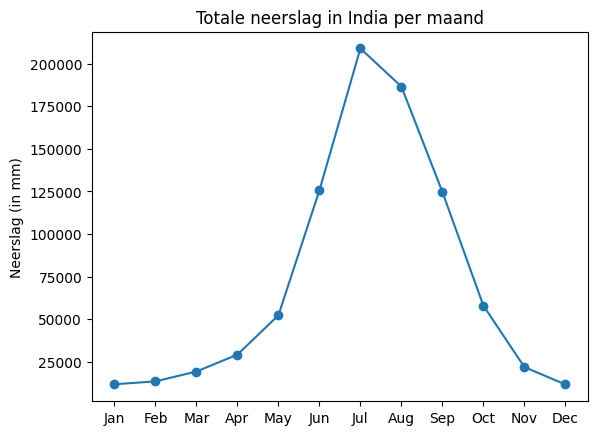

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import calendar

neerslag_data = np.loadtxt('district_wise_rainfall_india.csv', delimiter=',',
                           skiprows=1, usecols=range(2,14))
opgeteld = neerslag_data.sum(axis=0)
print(opgeteld)
plt.title('Totale neerslag in India per maand')
plt.ylabel('Neerslag (in mm)')
plt.xticks(np.arange(12), calendar.month_abbr[1:13])
plt.plot(np.arange(12), opgeteld, '-o')
plt.show()

# Opdracht 2: Thuisvoordeel in voetbalwedstrijden

In het bestand `FMEL_Dataset.csv` dat op de DLO te vinden is ([bron van data](https://www.kaggle.com/ricardomoya/football-matches-of-spanish-league/data)), zijn uitslagen te vinden van alle voetbalwedstrijden in de Spaanse 1e en 2e divisie vanaf 1970.

Jou is gevraagd om te onderzoeken wat het voordeel is van de thuisspelende clubs ten opzichte van uitspelende clubs. Wat je hiervoor moet doen is:
- Trek voor elke wedstrijd het aantal uitdoelpunten af van het aantal thuisdoelpunten (een positief getal betekent dus dat de thuisclub heeft gewonnen) en zet deze uitkomsten in één array (de lengte van deze nieuwe array is dus gelijk aan het aantal wedstrijden).
- Je moet voor elk getal dat voorkomt in de array tellen hoe vaak deze voorkomt en deze resultaten in een staafdiagram (bar chart) zetten.
- De categorien/staven (op de x-as) van het diagram moeten lopen van de minimum t/m de maximum waardes in de array (bijv. 21 staven; van -10 t/m +10).
- Geef het diagram duidelijke labels voor de x en y-as en een titel.


In [8]:
uitslagen_data = np.loadtxt('FMEL_Dataset.csv', delimiter=',', skiprows=1,
                            usecols=(6,7), dtype='int')
print(uitslagen_data)
thuis_min_uit = uitslagen_data[:,0] - uitslagen_data[:,1]
print(thuis_min_uit)
x = np.arange(min(thuis_min_uit),max(thuis_min_uit)+1,1)
print(x)
y = np.bincount(thuis_min_uit - min(thuis_min_uit))
print(y)
"""
thuis_min_uit = uitslagen_data[:,0] - uitslagen_data[:,1]

# De categorien (of staven) in de bar chart moeten lopen van de minimum t/m de
# maximum waardes.


# np.bincount telt het aantal keren dat een getal voorkomt en geeft een array
# met aantallen terug. Het telt alleen positieve getallen vanaf nul. 
# print (np.bincount(np.array([3,4,5,4]))) --> [0 0 0 1 2 1]
# Daarom zal "np.bincount(thuis_min_uit)" een foutmelding geven. Hieronder is
# een trucje toegepast om ook negatieve getallen te laten meetellen.
y = np.bincount(thuis_min_uit - min(thuis_min_uit))

plt.bar(x, y)
plt.title('Verschil thuisdoelpunten t.o.v. uitdoelpunten')
plt.ylabel('Aantal')
plt.xlabel('Verschil in doelpunten (thuis - uit)')
plt.xticks(x, x)
plt.show()
"""

[[1 1]
 [1 1]
 [2 0]
 ...
 [1 0]
 [1 0]
 [0 2]]
[ 0  0  2 ...  1  1 -2]
[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9]
[    3     1    16    47   228   674  2003  4930 10018  9224  5349  2421
   964   300    86    33     7     1]


'\nthuis_min_uit = uitslagen_data[:,0] - uitslagen_data[:,1]\n\n# De categorien (of staven) in de bar chart moeten lopen van de minimum t/m de\n# maximum waardes.\n\n\n# np.bincount telt het aantal keren dat een getal voorkomt en geeft een array\n# met aantallen terug. Het telt alleen positieve getallen vanaf nul. \n# print (np.bincount(np.array([3,4,5,4]))) --> [0 0 0 1 2 1]\n# Daarom zal "np.bincount(thuis_min_uit)" een foutmelding geven. Hieronder is\n# een trucje toegepast om ook negatieve getallen te laten meetellen.\ny = np.bincount(thuis_min_uit - min(thuis_min_uit))\n\nplt.bar(x, y)\nplt.title(\'Verschil thuisdoelpunten t.o.v. uitdoelpunten\')\nplt.ylabel(\'Aantal\')\nplt.xlabel(\'Verschil in doelpunten (thuis - uit)\')\nplt.xticks(x, x)\nplt.show()\n'

# Opdracht 3: Aantal doelpunten per wedstrijd

Gebruik hetzelfde bestand als bij opdracht 2 om een cirkeldiagram (pie chart) te maken die een overzicht geeft van hoeveel doelpunten er per wedstrijd zijn gescoord. Bepaal hiervoor dus hoevaak elk doelpuntaantal voorkomt in de data (bijv. 0x gescoord in 3665 wedstrijden; 1x gescoord in 7515 wedstrijden).<br>
Hieronder een voorbeeld hoe het diagram er uit kan komen te zien:<br> <img src="cirkeldiagram.png" align="left">


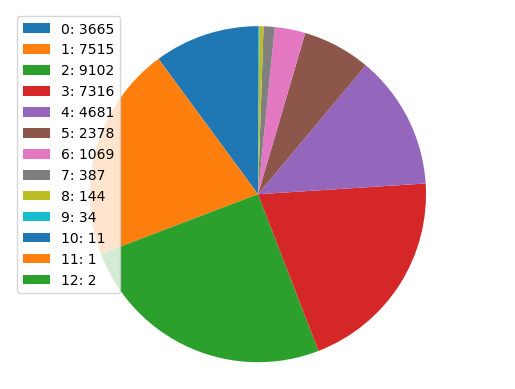

In [3]:
thuis_plus_uit = uitslagen_data[:,0] + uitslagen_data[:,1]
sizes = np.bincount(thuis_plus_uit)
labels = np.arange(min(thuis_plus_uit),max(thuis_plus_uit)+1,1)

plt.pie(sizes, startangle=90) 
plt.legend(labels=['%i: %i' % (l, s) for l, s in zip(labels, sizes)])
plt.axis('equal')
plt.show()

# Opdracht 4: Wiskundige xy-assenstelsel

Maak een wiskundig xy-assenstelel waar de x- en de y-coordinaten -5 tot 5 zijn.
De figuurgrootte moet 7x7 zijn. De output moet er als volgt uit zien: <br>
<img src="opd4.png" align="left">

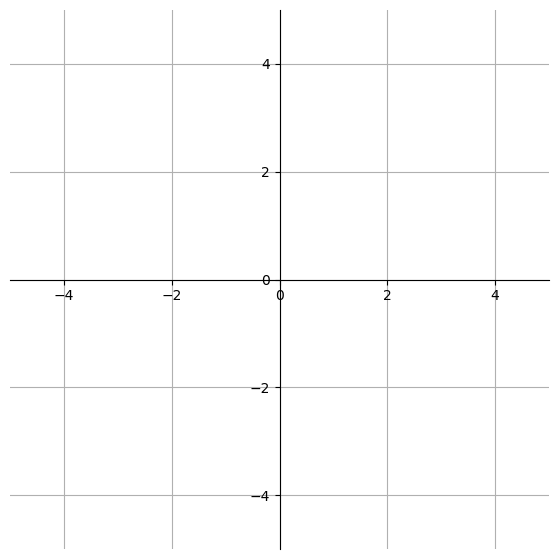

In [4]:
# bepaal de lengte van de assenstelsel
xmin, xmax, ymin, ymax = -5, 5, -5, 5

# Bepaal de grootte  van de te plotten van alle punten met een figuurgrootte
_, ax = plt.subplots(figsize=(7, 7))
# bepaal de x- en de y-limiet van de assen
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')

# Bepaal dat de assenstelsel door de 0 gaat
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Zorg dat de lijnen niet zichtbaar zijn
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid()

plt.show()


# Opdracht 5: grafiek tonen met een assenstelsel.




Plaats in een assenstelsel de functie f.
De functie f wordt als volgt gedefinieerd: $x^{4} - 6x^{2} + 4x + 12$
Hierbij moet op positie (2.3, 14) de letter f getoond worden. Deze is 16 groot.
De output moet er als volgt uit zien: <br>
<img src="opd5.png" align="left">

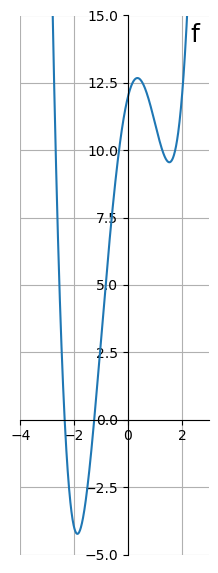

In [5]:
# bepaal de lengte van de assenstelsel
xmin, xmax, ymin, ymax = -4, 3, -5, 15

# Bepaal de grootte  van de te plotten van alle punten met een figuurgrootte
_, ax = plt.subplots(figsize=(7, 7))
# bepaal de x- en de y-limiet van de assen
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax), aspect='equal')

# Bepaal dat de assenstelsel door de 0 gaat
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Zorg dat de lijnen niet zichtbaar zijn
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x = np.arange(-5, 5,  0.01)
y = x**4 - 6*x**2 + 4*x + 12
plt.plot(x, y)

plt.text(2.3, 14, 'f',  {'size':'18' })

plt.grid(True)

plt.show()
